# <center> Lab 2 Examples 
## <center>    Derivatives
    
In this lab, we will learn how to take derivatives and we will look relationship between the graph of a function and its derivative.

**Video**: https://youtu.be/TLYGt3lq3I8
    
We start with importing needed libraries. We will use NumPy, SymPy and Matlplotlib. 
    
I will also add symbol 'x' for SymPy.
    


In [2]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt


sp.var('x')

x

#### Example 1
    
Let $f(x)=e^x+\sin(x)$. 

Suppose we want to draw the graph of its derivative. There are two ways of doing it:
1. Find derivative manually and create a new function using `def` that is equal to it
2. Use SymPy to find derivative and then convert it to NumPy type function to draw the graph.

The first way is not very interesting. So we will focus on the second way here.

To take derivative using SymPy, we can use `.diff` command:

In [3]:
f=sp.sin(x)+sp.exp(x)
print('f(x)=',f)

f(x)= exp(x) + sin(x)


In [4]:
fd=f.diff(x)
print("f'(x)=",fd)  # notice we have to use double quotes here, because we need to use single quote to denote prime sign.

f'(x)= exp(x) + cos(x)


We can evalute this derivative at any point as any other SymPy function using `.subs`. For example, let's evalute it at $x=1$

In [5]:
sp.N(fd.subs(x,1))

3.25858413432718

We can also take higher order derivatives. For example, here is the second derivative:

In [6]:
fd2=f.diff(x,x)
print('f"(x)=',fd2)  # we can do the quotes the other way too if needed.

f"(x)= exp(x) - sin(x)


Now to draw the graph of the derivative, first we need to convert our derivative to a NumPy function using `lamdify`:

In [7]:
fdn=sp.lambdify(x,fd,'numpy')

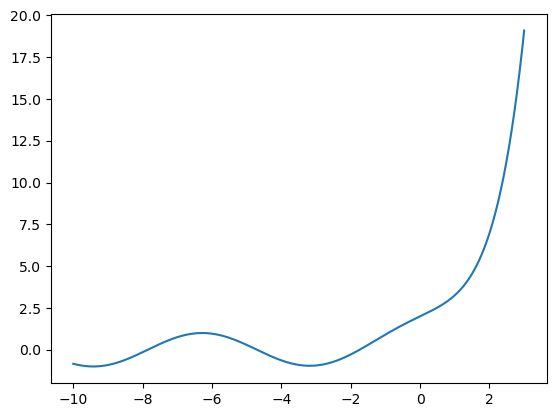

In [8]:
xval=np.linspace(-10,3,1000)

fig=plt.figure()
plt.plot(xval,fdn(xval))
plt.show()

Let's also add a grid to our graph to make it a bit more readable:

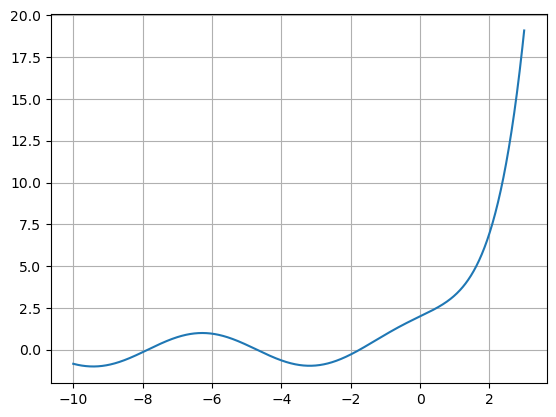

In [9]:
fig=plt.figure()

plt.plot(xval,fdn(xval))
plt.grid()
plt.show()

Note: you can move your cursor over the graph above and in the corner you should see the actual coordinates as well.

#### Example 2

The stopping distance $T$ of an automobile, on dry, level pavement, traveling at the speed $v$ (in kilometers per hour) is the distance $R$ (in meters) the car travels during the reaction time of the driver plus the distance $B$ (in meters) the car travels after the breaks are applied. The table below shows the results of an experiment
$$
\begin{aligned}
&\begin{array}{|c|c|c|c|c|c|}
\hline \hline 
v & 20 & 40 & 60 & 80 &100 \\
\hline 
R & 8.3 & 16.7 & 25.0 & 33.3 & 41.7\\
\hline
B & 2.3 & 9.0 & 20.2 & 35.8 & 55.9\\
\hline
\end{array}
\end{aligned}
$$

The goal of this problem is to find a linear model for $R$ and quadratic model for $B$, then find $T$ and the derivative of $T$.


To start, let's create 3 arrays with our values:

In [10]:
v=[20,40,60,80,100]
R=[8.3,16.7, 25.0,33.3,41.7]
B=[2.3,9.0,20.2,35.8,55.9]

Next, we will use NumPy to create a linear model for R and quadratic one for B. 

NumPy has a sublibrary `polynomial` that can do a lot of nice things with polynomials. To avoid writing np.polynomial.Polynomial all the time we should add this sublibrary separatelly. In your Lab, you should add it right away with all other libraries: 

In [11]:
from numpy.polynomial import *


# Next two commands create the models. Which in reality are just coefficients of your polynomial model.
Rmodel=polynomial.polyfit(v,R,1) # 1 at the end is the degree of the model. Here it is 1, so linear.
Bmodel=polynomial.polyfit(v,B,2)


xval=np.linspace(0,100,1000)

# Next two commands evaluate your models at xval. 
Rfit=polynomial.polyval(xval,Rmodel)
Bfit=polynomial.polyval(xval,Bmodel)

Lets plot each one of them together with the actual data to see how well they fit. We will use a new commands `scatter` to plot individual points:

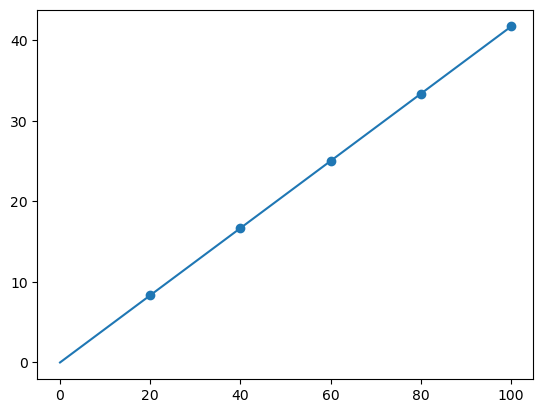

In [12]:
fig=plt.figure()
plt.scatter(v,R)
plt.plot(xval,Rfit)
plt.show()

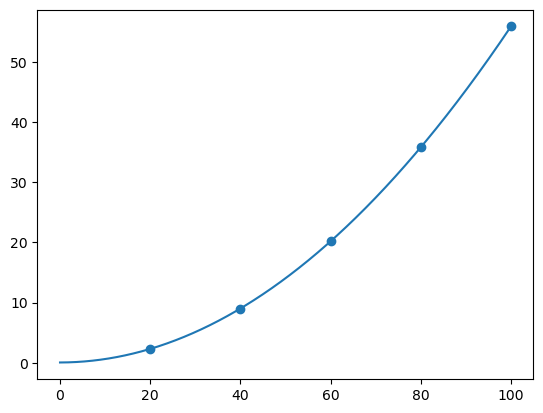

In [13]:
fig=plt.figure()
plt.scatter(v,B)
plt.plot(xval,Bfit)
plt.show()

Let's look at Rmodel and Bmodel. Recall, they both contain coefficients of corresponding polynomial models:

In [14]:
print("Coef of B Model = ", Bmodel)
print("Coef of R Model = ", Rmodel)

Coef of B Model =  [0.04       0.00142857 0.00557143]
Coef of R Model =  [-0.02   0.417]


We can create actual polynomial functions out of these coefficents.

In [15]:
Bpoly=Polynomial(Bmodel)
Rpoly=Polynomial(Rmodel)

In [16]:
Bpoly

Polynomial([0.04      , 0.00142857, 0.00557143], domain=[-1,  1], window=[-1,  1], symbol='x')

In [17]:
Rpoly

Polynomial([-0.02 ,  0.417], domain=[-1,  1], window=[-1,  1], symbol='x')

Let's create our polynomial functions and add them to get model for T. 


In [18]:
Tpoly=Bpoly+Rpoly
Tpoly

Polynomial([0.02      , 0.41842857, 0.00557143], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Let's take the derivative and plot it. We can keep using NumPy's polynomial commands to do that:

In [19]:
Td=Tpoly.deriv()
Td

Polynomial([0.41842857, 0.01114286], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

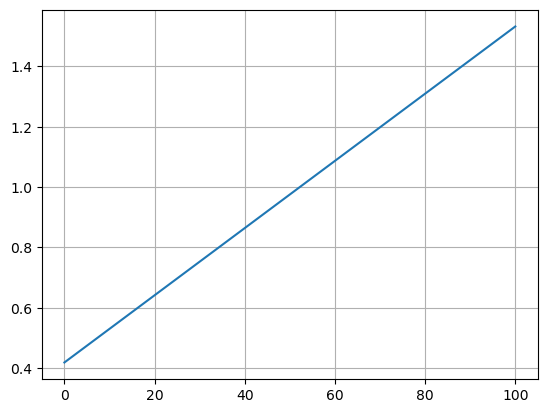

In [20]:
fig=plt.figure()

plt.plot(xval,Td(xval))
plt.grid()
plt.show()

What does this graph tell us? 

It tells us that the stopping distance increases at an increasing rate.


#### Example 3

This is a short example to show case two things: solve commands and some graph improvements.

Let $f(x)=\sin(\pi x)$. Let's plot both $f(x)$ and $f'(x)$ on the same graph:

In [21]:
f=sp.sin(sp.pi*x)
derf=f.diff(x)

fn=sp.lambdify(x,f,'numpy')
derfn=sp.lambdify(x,derf,'numpy')

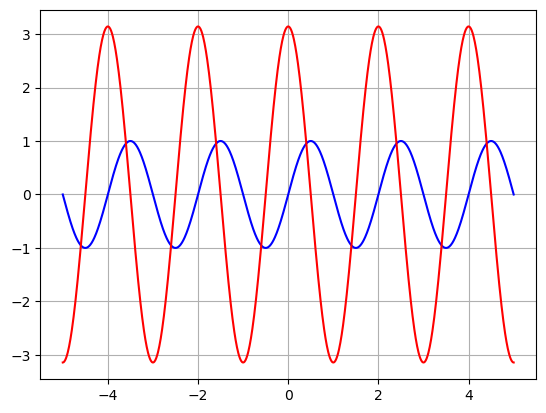

In [22]:
xval=np.linspace(-5,5,1000)

fig=plt.figure()

plt.plot(xval,fn(xval), color='blue')
plt.plot(xval,derfn(xval), color='red')
plt.grid()
plt.show()

Let's add few extras like title, legend for the graph, thicker axes more ticks on x-axis. Also, lets make the figure bigger.

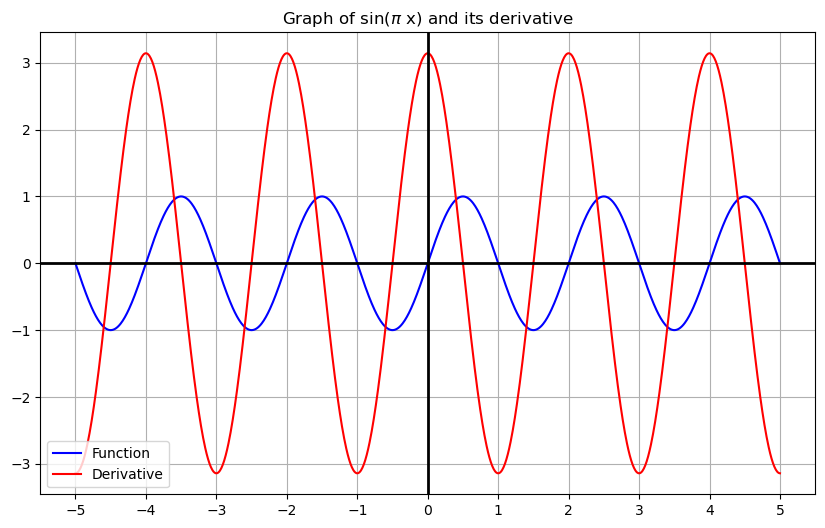

In [23]:
fig=plt.figure(figsize=(10,6))  # figsize is th size of the figure

plt.plot(xval,fn(xval), color='blue', label="Function")   # Label is for the legend
plt.plot(xval,derfn(xval),color='red', label="Derivative")

plt.xticks(np.arange(-5, 6, 1)) # ticks, Notice we have to go one tick higher

plt.axhline(0, color='black', lw=2)    # horizonal line (x-axis)
plt.axvline(0, color='black', lw=2)    # vertical line (y-axis)

plt.title('Graph of sin($\pi$ x) and its derivative')
plt.legend(loc ="lower left")
plt.grid()

plt.show()

Finally, suppose we want to know when the derivative equals to zero. We can use a command `solve` from SymPy. It can't solve all equations, but it can do polynomial, rational, simpler trigonometric and exponential equations, etc.

The syntax is `sp.solveset(expr, var)`, where the equation is `expr`=0 and you solve for variable `var`

In [24]:
sp.solveset(derf,x)

Union(ImageSet(Lambda(_n, (2*_n*pi + pi/2)/pi), Integers), ImageSet(Lambda(_n, (2*_n*pi - pi/2)/pi), Integers))

For trig equation, we got all solutions in one period plus period. 

We can simplify our solutions sometimes using `sp.simplify()` or `sp.N`:

In [25]:
sp.simplify(sp.solveset(derf,x))

Union(ImageSet(Lambda(_n, 2*_n + 1/2), Integers), ImageSet(Lambda(_n, 2*_n + 3/2), Integers))

In [26]:
sp.N(sp.solveset(derf,x))

Union(ImageSet(Lambda(_n, 2.0*_n + 0.5), Integers), ImageSet(Lambda(_n, 2.0*_n - 0.5), Integers))

In some cases you can also use `sp.solve` command. While it is outdated, it can be a bit more readable in some case (especially with trigonomettric functions, when it will give all solutions in the first period):

In [27]:
sp.solve(derf,x)

[1/2, 3/2]

Finally, there is also `nsolve` command, that estimates one of the solution. These commands are still in development and most likely will be better in the future.

`nsolve` uses iterative process to find one of the roots. This means it starts at some given points and then uses some algorythm to get closer and closer to a root. This means if you start at the different place, you might estimate a different root. In the command below, you can see number $1$ inside. This is a starting point. It leads to a root 1.5. Try changing that 1 to something else. You should be able to see that for some numbers, you will get other roots.

In [28]:
sp.nsolve(derf,1)

1.50000000000000

There are a few other solvers for python out there. The only one that we should look at is a solver for polynomial equations. 

We can polynomial sublibrary of NumPy from Example 2 to find roots of polynomials.

#### Example 4

Let $f(x)=x^5-3x^3+x^2+x$. Let's find roots of this polynomial and roots of its derivative and its second derivative

In [29]:
f=Polynomial([0,1,1,-3,0,1])  # notice we have to add 0 for missing terms.
f

Polynomial([ 0.,  1.,  1., -3.,  0.,  1.], domain=[-1,  1], window=[-1,  1], symbol='x')

Now let's find roots of f(x)

In [30]:
print("Roots of f(x) =", Polynomial.roots(f))

Roots of f(x) = [-1.80193774 -0.44504187  0.          1.          1.2469796 ]


Now we will find the derivative. 

In [31]:
der=f.deriv()
der

Polynomial([ 1.,  2., -9.,  0.,  5.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [32]:
print("Roots of derivative=", Polynomial.roots(der))

Roots of derivative= [-1.40825823 -0.24299884  0.51383104  1.13742603]


In [33]:
der2=f.deriv(2)
der2

Polynomial([  2., -18.,   0.,  20.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [34]:
print("Roots of second derivative=", Polynomial.roots(der2))

Roots of second derivative= [-1.          0.11270167  0.88729833]


Finally, we can also plot these Polynomial objects with no problem:

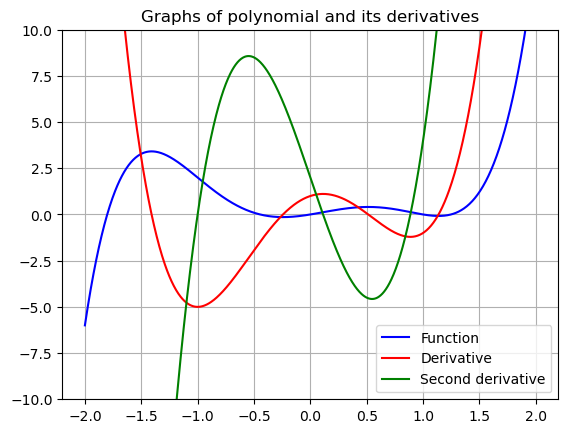

In [35]:
xval=np.linspace(-2,2,1000)

fig=plt.figure()

plt.plot(xval,f(xval), color='blue',label="Function")
plt.plot(xval,der(xval), color='red',label='Derivative')
plt.plot(xval,der2(xval), color='green', label='Second derivative')
plt.grid()

plt.ylim(-10,10)  # this will restrict y-axis between -10 and 10.

plt.title("Graphs of polynomial and its derivatives")
plt.legend(loc='lower right')
plt.show()

### Final Notes

Python has quite a few mathematical libraries, but it is not a mathematical software. We are familiar with NumPy and SymPy, and there are few other libraries out there. All of these libraries are created by different people and all of them are constantly being updated. This leads to a few problems. Sometimes things from different libraries do not interact well with each other. Sometimes there doesn't exist a command you would like to have. So we have to make due with what we have.

For example, we can define functions in NumPy and SymPy. Each of them even have few subcategories of functions (like Polynomial library in NumPy). Sometimes it is easy to convert from one type to another, like `lambdify` command. But sometimes it is not  possible and sometimes there are ways, but they a bit convoluted. Such things are beyond the scope of this class. Often you can find the help online if you really need to be able to do such conversions. Here however, if it is not given, it is often easier to just re-define your function in the type you need.